# Sensitivity, Specificity & ROC 

They characterize the performance of the classifier.            

Assume the outcome is predicting cancer(+ve) or healthy (-ve).      

**Outcomes**                        

| Case | Prediction | Actual | Wanting |  
| --- | --- | --- | --- |
| True Positive | diabetic | diabetic | Yes |
| True Negative | Healthy | Healthy | Yes |
| False Positive | diabetic | Healthy | False Alarm |
| False Negative | Healthy | diabetic | Worst Case |

Tips to remember:       
1. If starts with "True" : Prediction correct.      
2. If starts with "False" : Prediction incorrect. 
`

__**Performance Metrics**__
**Accuracy**
$$ Accuracy = \frac{TP + TN}{Total} $$
Precision is percentage of correct +ve instances from +ve predictions.
$$ Precision = \frac{TP}{TP + FP} $$
Recall (Sensitivity) is percentage of +ve predictions out of all +ve cases.
$$ Recall = Sensitivity = \frac{TP}{TP + FN}$$ 
Specificity : percentage of correct -ve predictions out of all -ve predictions.
$$ Specificity = \frac {TN}{TN + FP} $$

F1-Score : Harmonic Mean of Precision & Recall. Ensures one measaure doesnt improve at expense of other.
$$ F1 Score = \frac{2 * Recall * Precision}{Recall + Precision} $$

## How to Remember?

In confusion matrix :           
1. Prediction is always along rows (P followed by R: R for rows)           
2. Actual is always along columns (A followed by C: C for columns)         
3. Sensitivity is followed by Specificity in confusion matrix (Se followed by Sp)           
4. Precision is unique along rows (P followed by R : R in rows)            
![alt text](Images/Metrics.png)

Sensitivity & Specificity are similar with different +ve & -ve instances. **Percentage of class correctly identified**              
Precision is percentage of +ve instances from all +ve predicions

# When to use under different scenarios

| Metric | Scenarios | Scenarios | Scenarios |  
| --- | --- | --- | --- |
| Accuracy | Even Class Distribution | FP = FN | Similar Cost of FN, FP |
| F1 Score | Uneven Class Distribution | Cost are diff : FN, FP |   |
| Precision | more confident on TP | Spam | Comp wants to extra sure if its spam before spamming | 
| Recall | If FN is dangerous | positives are high priority | Security Check at airports |
| Specificity | If FP is dangerous | negatives are high priority | Good guy sent to Jail |

# ROC & PR(Precision-Recall) Curves

## ROC Curve:       
ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

The ROC curve is a useful tool for a few reasons:       
1.  The curves of different models can be compared directly in general or for different thresholds.             
2.  The area under the curve (AUC) can be used as a summary of the model skill.

**An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.**

_Ideal classifier_:  doesnt make any prediction errors, implying it achieves 100% TPR before producing any FPR. Hence the graph would steep up till 1 and flat out for increasing FPR.      
_Good Classifier_ : Get to good sensitivity (y axis) with low FPR (Good initial spike in y axis with zero/minimal FPR)          
_Bad Classifier_: Can get good TPR only at expense of high FPRs

Problems with ROC : ROC curves should be used when there are roughly equal numbers of observations for each class. Consider Cancer prediction, as RoC curve doesnt plot True Negative, (TPR Vs FPR) we might conclude wrongly about model performance by looking at ROC. We know that the model with good recall and FPR, will have good roc and in cancer prediction we are more focussed on -ve class. Precision would give good estimate on that. Check below example.

__Precision-Recall Curves__: 
Precision-Recall curves should be used when there is a moderate to large class imbalance.

### roc curve and auc on an imbalanced dataset


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


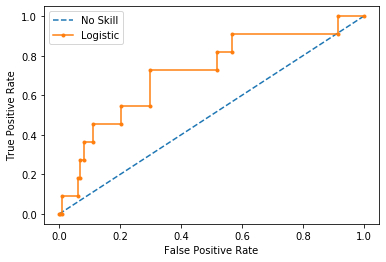

In [1]:
    # Check to make sure y_true is valid
    y_type = type_of_target(y_true)
    if not (y_type == "binary" or
            (y_type == "multiclass" and pos_label is not None)):
        raise ValueError("{0} format is not supported".format(y_type))from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

The model predicts all classes as +ve class. With class imbalance, the ROC is 0.716 because ROC doesnt include TN (The efficiency in predicting imbalance class). We might conclude wrongly about the model performance. Hence plot PR

## precision-recall curve and f1 for an imbalanced dataset

Logistic: f1=0.000 auc=0.054


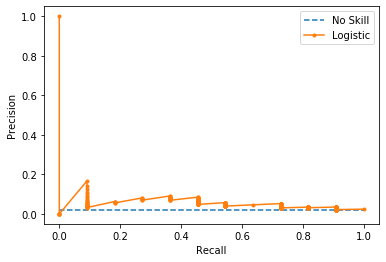

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

This gives a correct esimate of model performance esp with class imbalance. It says the auc is 0.054 and model is penalized for predicting majority +ve class for all cases.   The curve shows the mpodel which looked good from ROC is barely skillfull using precision, recall.


# Summary

1. ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.         
2. Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.          
3. ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

## Generating ROC Curves from Scratch

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
# Load datasetd
dataset = load_breast_cancer()
# Split data into train-test pools 
train, test, train_labels, test_labels = train_test_split(dataset['data'],
                                                          dataset['target'],
                                                          test_size=0.33)
# Train model 
logregr = LogisticRegression().fit(train, train_labels)

# Rename, listify 
actuals = list(test_labels)
# Predict probablities of test data [0,1]
scores = list(logregr.predict_proba(test)[:,1])
predictions = [1 if s>0.5 else 0 for s in scores]
print("Accuracy = %.3f" % (sum([p==a for p, a in zip(predictions, actuals)])/len(predictions)))

Accuracy = 0.947


In [7]:
import collections
ConfusionMatrix = collections.namedtuple('conf', ['tp','fp','tn','fn'])     # Check to make sure y_true is valid
    y_type = type_of_target(y_true)
    if not (y_type == "binary" or
            (y_type == "multiclass" and pos_label is not None)):
        raise ValueError("{0} format is not supported".format(y_type))

In [9]:
def calc_ConfusionMatrix(actuals, scores, threshold=0.5, positive_label=1):
    tp=fp=tn=fn=0
    bool_actuals = [act==positive_label for act in actuals]
    for truth, score in zip(bool_actuals, scores):
        if score > threshold:                      # predicted positive 
            if truth:                              # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if not truth:                          # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
    return ConfusionMatrix(tp, fp, tn, fn)
def ACC(conf_mtrx):
    return (conf_mtrx.tp + conf_mtrx.tn) / (conf_mtrx.fp + conf_mtrx.tn + conf_mtrx.tp + conf_mtrx.fn)

def FPR(conf_mtrx):
    return conf_mtrx.fp / (conf_mtrx.fp + conf_mtrx.tn) if (conf_mtrx.fp + conf_mtrx.tn)!=0 else 0

def TPR(conf_mtrx):
    return conf_mtrx.tp / (conf_mtrx.tp + conf_mtrx.fn) if (conf_mtrx.tp + conf_mtrx.fn)!=0 else 0

In [64]:
def apply(actuals, scores, **fxns):
    # generate thresholds over score domain 
    low = min(scores)
    high = max(scores)
    step = (abs(low) + abs(high)) / 1000
    thresholds = np.arange(low-step, high+step, step)
    # calculate confusion matrices for all thresholds
    confusionMatrices = []
    for threshold in thresholds:
        # print("$$")
        # print(threshold)
        # print(calc_ConfusionMatrix(actuals, scores, threshold))
        confusionMatrices.append(calc_ConfusionMatrix(actuals, scores, threshold))
    # apply functions to confusion matrices 
    print(fxns.items())
    results = {fname:list(map(fxn, confusionMatrices)) for fname, fxn in fxns.items()}
    results["THR"] = thresholds
    return results

In [65]:
import numpy as np
acc = apply(actuals,  scores, ACC=ACC)

dict_items([('ACC', <function ACC at 0x000000000A960D38>)])


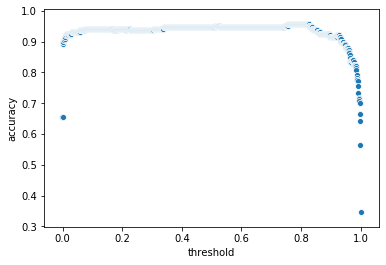

In [35]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(list(acc.values())).T
df.columns = ['accuracy','threshold']
sns.scatterplot(df['threshold'], df['accuracy'])

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
# Load datasetd
dataset = load_breast_cancer()
# Split data into train-test pools 
train, test, train_labels, test_labels = train_test_split(dataset['data'],
                                                          dataset['target'],
                                                          test_size=0.33)
# Train model 
logregr = LogisticRegression().fit(train, train_labels)

# Rename, listify 
actuals = list(test_labels)
# Predict probablities of test data [0,1]
scores = list(logregr.predict_proba(test)[:,1])
predictions = [1 if s>0.5 else 0 for s in scores]
print("Accuracy = %.3f" % (sum([p==a for p, a in zip(predictions, actuals)])/len(predictions)))

Accuracy = 0.963


In [11]:
y_true = train_labels
y_score = scores
# Check to make sure y_true is valid
y_type = "binary"
pos_label = None
import numpy as np
classes = np.unique(y_true)
if (pos_label is None and (
        classes.dtype.kind in ('O', 'U', 'S') or
        not (np.array_equal(classes, [0, 1]) or
                np.array_equal(classes, [-1, 1]) or
                np.array_equal(classes, [0]) or
                np.array_equal(classes, [-1]) or
                np.array_equal(classes, [1])))):
    classes_repr = ", ".join(repr(c) for c in classes)
    raise ValueError("y_true takes value in {{{classes_repr}}} and "
                        "pos_label is not specified: either make y_true "
                        "take value in {{0, 1}} or {{-1, 1}} or "
                        "pass pos_label explicitly.".format(
                            classes_repr=classes_repr))
elif pos_label is None:
    pos_label = 1.


In [16]:
y_true = (y_true == pos_label)
# desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
# y_score = y_score[desc_score_indices]
# y_true = y_true[desc_score_indices]

In [17]:
distinct_value_indices = np.where(np.diff(y_score))[0]
threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

In [20]:
threshold_idxs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
distinct_value_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [25]:
weight = 1
tps = np.cumsum((y_true * weight)[threshold_idxs])
tps


array([  0,   1,   1,   2,   3,   3,   4,   5,   5,   5,   6,   7,   8,
         9,   9,  10,  11,  11,  11,  11,  12,  12,  12,  13,  13,  14,
        15,  16,  17,  18,  19,  20,  20,  21,  22,  23,  24,  24,  25,
        25,  26,  27,  28,  29,  30,  30,  31,  32,  33,  33,  33,  34,
        35,  36,  37,  38,  38,  39,  39,  40,  41,  42,  42,  42,  43,
        43,  43,  43,  44,  44,  44,  45,  46,  47,  47,  48,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  61,
        62,  63,  63,  63,  63,  63,  64,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  72,  72,  73,  74,  75,  75,  75,  76,  77,  77,
        78,  78,  79,  80,  80,  81,  82,  82,  83,  84,  84,  85,  86,
        87,  88,  88,  88,  88,  89,  90,  91,  92,  93,  94,  95,  95,
        96,  96,  96,  97,  97,  98,  98,  98,  99, 100, 100, 101, 101,
       101, 101, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 104,
       104, 105, 106, 106, 107, 107, 108, 108, 109, 110, 110, 11

In [ ]:
def _binary_clf_curve(y_true, y_score, pos_label=None, sample_weight=None):
    """Calculate true and false positives per binary classification threshold.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        True targets of binary classification

    y_score : array, shape = [n_samples]
        Estimated probabilities or decision function

    pos_label : int or str, default=None
        The label of the positive class

    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.

    Returns
    -------
    fps : array, shape = [n_thresholds]
        A count of false positives, at index i being the number of negative
        samples assigned a score >= thresholds[i]. The total number of
        negative samples is equal to fps[-1] (thus true negatives are given by
        fps[-1] - fps).

    tps : array, shape = [n_thresholds <= len(np.unique(y_score))]
        An increasing count of true positives, at index i being the number
        of positive samples assigned a score >= thresholds[i]. The total
        number of positive samples is equal to tps[-1] (thus false negatives
        are given by tps[-1] - tps).

    thresholds : array, shape = [n_thresholds]
        Decreasing score values.
    """
    # Check to make sure y_true is valid
    y_type = type_of_target(y_true)
    if not (y_type == "binary" or
            (y_type == "multiclass" and pos_label is not None)):
        raise ValueError("{0} format is not supported".format(y_type))

    check_consistent_length(y_true, y_score, sample_weight)
    y_true = column_or_1d(y_true)
    y_score = column_or_1d(y_score)
    assert_all_finite(y_true)
    assert_all_finite(y_score)

    if sample_weight is not None:
        sample_weight = column_or_1d(sample_weight)

    # ensure binary classification if pos_label is not specified
    # classes.dtype.kind in ('O', 'U', 'S') is required to avoid
    # triggering a FutureWarning by calling np.array_equal(a, b)
    # when elements in the two arrays are not comparable.
    classes = np.unique(y_true)
    if (pos_label is None and (
            classes.dtype.kind in ('O', 'U', 'S') or
            not (np.array_equal(classes, [0, 1]) or
                 np.array_equal(classes, [-1, 1]) or
                 np.array_equal(classes, [0]) or
                 np.array_equal(classes, [-1]) or
                 np.array_equal(classes, [1])))):
        classes_repr = ", ".join(repr(c) for c in classes)
        raise ValueError("y_true takes value in {{{classes_repr}}} and "
                         "pos_label is not specified: either make y_true "
                         "take value in {{0, 1}} or {{-1, 1}} or "
                         "pass pos_label explicitly.".format(
                             classes_repr=classes_repr))
    elif pos_label is None:
        pos_label = 1.

    # make y_true a boolean vector
    y_true = (y_true == pos_label)

    # sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
    if sample_weight is not None:
        weight = sample_weight[desc_score_indices]
    else:
        weight = 1.

    # y_score typically has many tied values. Here we extract
    # the indices associated with the distinct values. We also
    # concatenate a value for the end of the curve.
    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    # accumulate the true positives with decreasing threshold
    tps = stable_cumsum(y_true * weight)[threshold_idxs]
    if sample_weight is not None:
        # express fps as a cumsum to ensure fps is increasing even in
        # the presence of floating point errors
        fps = stable_cumsum((1 - y_true) * weight)[threshold_idxs]
    else:
        fps = 1 + threshold_idxs - tps
    return fps, tps, y_score[threshold_idxs]